In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("transformed_data.csv")
data2 = pd.read_csv("raw_data.csv")

In [158]:
#Firstly apply EDA on data
data.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [4]:
data.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [5]:
data.shape

(50418, 9)

In [6]:
data.isnull().sum()

CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


In [8]:
data["COUNTRY"].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [9]:
print(data.corr())

             HDI        TC        TD       STI       POP    GDPCAP
HDI     1.000000  0.108382  0.171213 -0.125472 -0.100809  0.561700
TC      0.108382  1.000000  0.918372  0.436218  0.404210  0.255518
TD      0.171213  0.918372  1.000000  0.369793  0.484035  0.299809
STI    -0.125472  0.436218  0.369793  1.000000  0.392935  0.257467
POP    -0.100809  0.404210  0.484035  0.392935  1.000000  0.458802
GDPCAP  0.561700  0.255518  0.299809  0.257467  0.458802  1.000000


<AxesSubplot:>

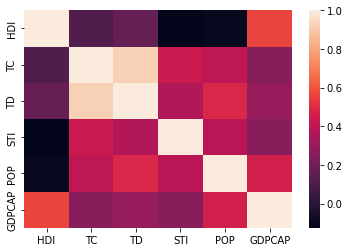

In [10]:
sns.heatmap(data.corr())

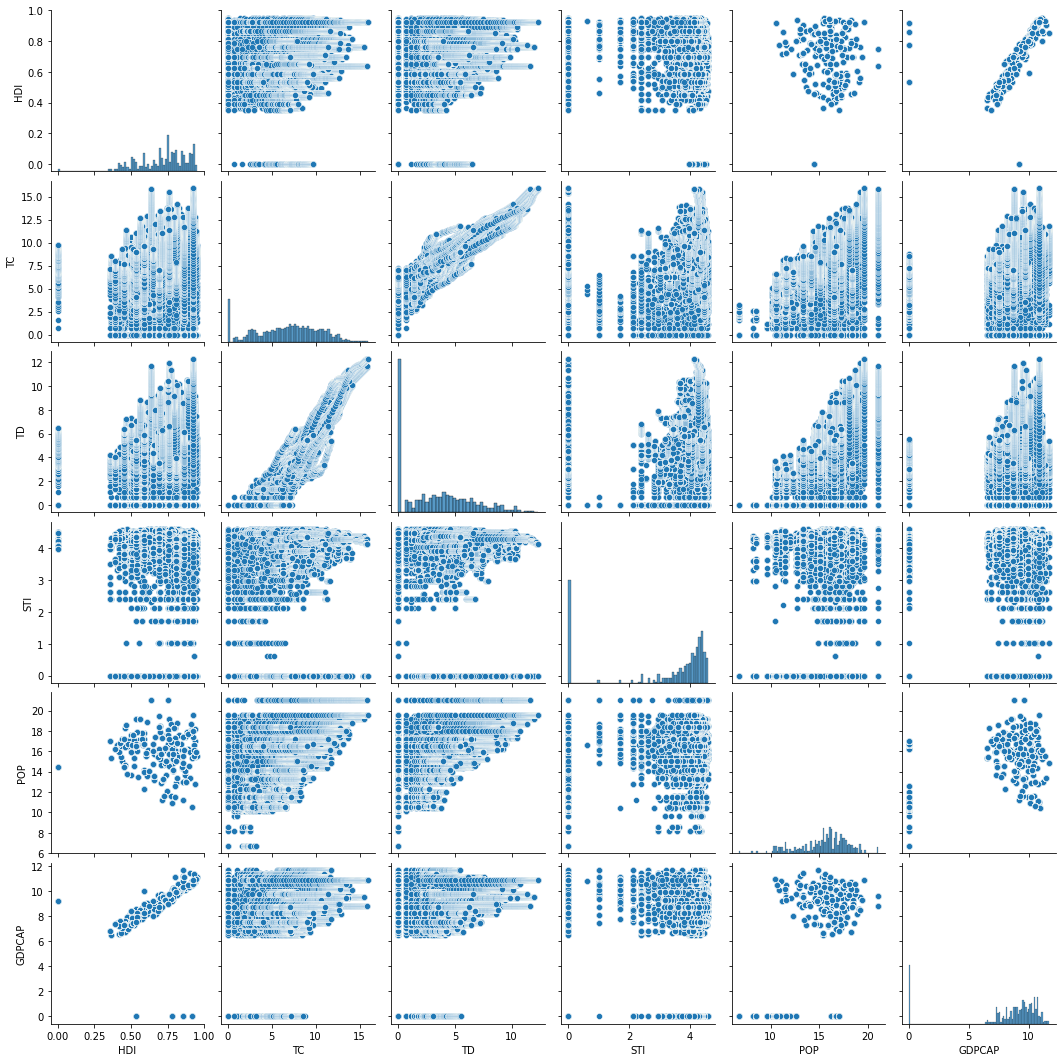

In [11]:
sns.pairplot(data)

In [12]:
#Now secondly  apply EDA on data2
data2.head(10)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
5,AFG,Afghanistan,2020-01-05,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
6,AFG,Afghanistan,2020-01-06,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
7,AFG,Afghanistan,2020-01-07,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
8,AFG,Afghanistan,2020-01-08,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
9,AFG,Afghanistan,2020-01-09,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [16]:
data2.shape

(50418, 14)

In [14]:
data2.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 12
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000,50418.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139,15.442097
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902,2.495039
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000,6.695799
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000,14.151619
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000,15.929201
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000,17.187513
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000,21.087439


In [17]:
data2.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64

In [18]:
data2["location"].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: location, Length: 210, dtype: int64

In [19]:
print(data.corr())

             HDI        TC        TD       STI       POP    GDPCAP
HDI     1.000000  0.108382  0.171213 -0.125472 -0.100809  0.561700
TC      0.108382  1.000000  0.918372  0.436218  0.404210  0.255518
TD      0.171213  0.918372  1.000000  0.369793  0.484035  0.299809
STI    -0.125472  0.436218  0.369793  1.000000  0.392935  0.257467
POP    -0.100809  0.404210  0.484035  0.392935  1.000000  0.458802
GDPCAP  0.561700  0.255518  0.299809  0.257467  0.458802  1.000000


<AxesSubplot:>

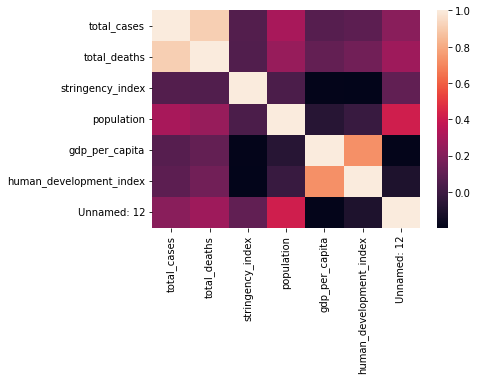

In [173]:
sns.heatmap(data2.corr())

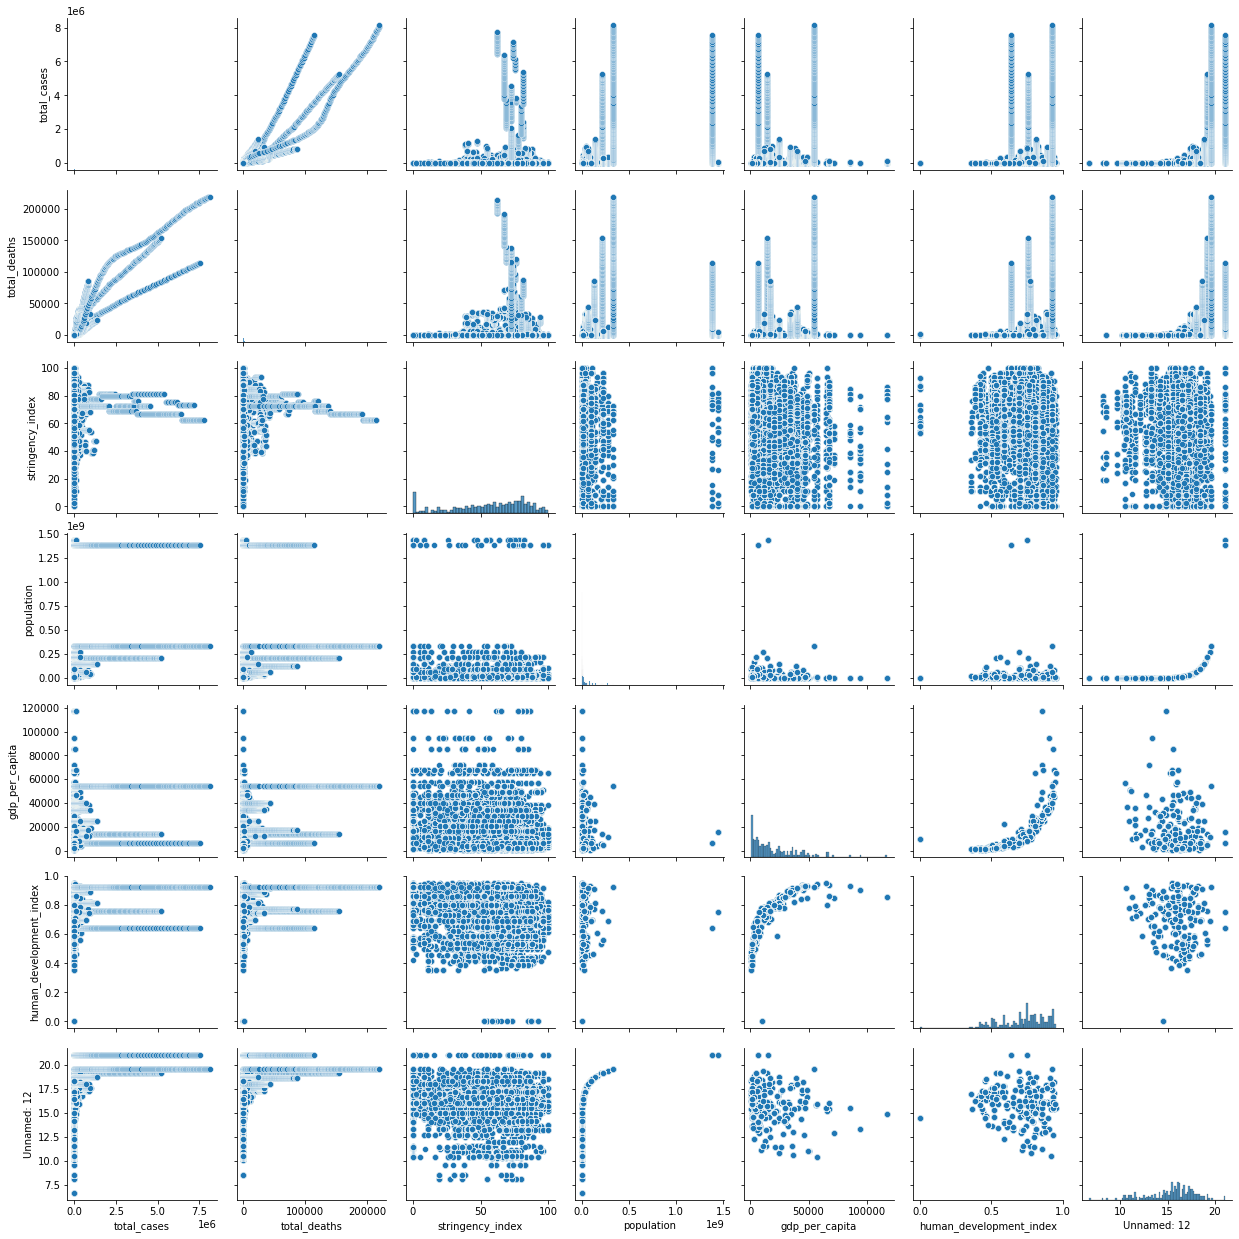

In [20]:
sns.pairplot(data2)